In [10]:
import os
os.getcwd()
os.chdir(r'C:\Users\lorib\Desktop\Class Work\API_HW')

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


In [12]:
# Output File (CSV)
city_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [13]:
# List for holding lat_lngs and cities
cordsinates = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
cordsinates = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for location in cordsinates:
    city = citipy.nearest_city(location[0], location[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

Perform API Calls

In [14]:

# OpenWeatherMap API Key
#api_key = api_keys.api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for x, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (x % 50 == 0 and x >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out the max temp, humidity, and cloudiness
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
        

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | izhma
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | nuuk
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | glenwood springs
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | puerto ayora
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | saint george
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | ambikapur
Processing Record 15 of Set 1 | kaitangata
Processing Record 16 of Set 1 | acapulco
Processing Record 17 of Set 1 | santa maria do para
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | dembi dolo
Processing Record 21 of Set 1 | tasiilaq
Processing R

Processing Record 34 of Set 4 | lompoc
Processing Record 35 of Set 4 | atuona
Processing Record 36 of Set 4 | arraial do cabo
Processing Record 37 of Set 4 | bajo baudo
City not found. Skipping...
Processing Record 38 of Set 4 | cutcut
Processing Record 39 of Set 4 | sloboda
Processing Record 40 of Set 4 | omboue
Processing Record 41 of Set 4 | manokwari
Processing Record 42 of Set 4 | los llanos de aridane
Processing Record 43 of Set 4 | saleaula
City not found. Skipping...
Processing Record 44 of Set 4 | yerbogachen
Processing Record 45 of Set 4 | butiama
Processing Record 46 of Set 4 | patna
Processing Record 47 of Set 4 | lagoa
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | tapaua
City not found. Skipping...
Processing Record 0 of Set 5 | touros
Processing Record 1 of Set 5 | terrace bay
Processing Record 2 of Set 5 | port hedland
Processing Record 3 of Set 5 | kizilskoye
Processing Record 4 of Set 5 | amderma
City not found. Skipping...
Processing Rec

Processing Record 21 of Set 8 | wakkanai
Processing Record 22 of Set 8 | alotau
City not found. Skipping...
Processing Record 23 of Set 8 | virtsu
Processing Record 24 of Set 8 | almaznyy
Processing Record 25 of Set 8 | isangel
Processing Record 26 of Set 8 | thohoyandou
Processing Record 27 of Set 8 | saraland
Processing Record 28 of Set 8 | stamsund
City not found. Skipping...
Processing Record 29 of Set 8 | gorontalo
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | westport
Processing Record 32 of Set 8 | rio gallegos
Processing Record 33 of Set 8 | santa flavia
Processing Record 34 of Set 8 | khatanga
Processing Record 35 of Set 8 | yabrud
Processing Record 36 of Set 8 | bac lieu
City not found. Skipping...
Processing Record 37 of Set 8 | luanda
Processing Record 38 of Set 8 | bambanglipuro
Processing Record 39 of Set 8 | presidencia roque saenz pena
Processing Record 40 of Set 8 | sabang
Processing Record 41 of Set 8 | babanusah
City not found. Skipping..

Processing Record 6 of Set 12 | kasungu
Processing Record 7 of Set 12 | jaciara
Processing Record 8 of Set 12 | rudbar
City not found. Skipping...
Processing Record 9 of Set 12 | asau
City not found. Skipping...
Processing Record 10 of Set 12 | dodge city
Processing Record 11 of Set 12 | umea
Processing Record 12 of Set 12 | lashio
Processing Record 13 of Set 12 | zanzibar
City not found. Skipping...
Processing Record 14 of Set 12 | bom jardim
Processing Record 15 of Set 12 | jiwani
Processing Record 16 of Set 12 | artyk
City not found. Skipping...
Processing Record 17 of Set 12 | saint-esteve
Processing Record 18 of Set 12 | ordynskoye
Processing Record 19 of Set 12 | gat
Processing Record 20 of Set 12 | kemin
Processing Record 21 of Set 12 | haines junction
Processing Record 22 of Set 12 | vieques
Processing Record 23 of Set 12 | talara
Processing Record 24 of Set 12 | lebyazhye
Processing Record 25 of Set 12 | lorengau
Processing Record 26 of Set 12 | barawe
City not found. Skipping

In [20]:
# Convert array of JSONs into Pandas DataFrame
city_data_pd = pd.DataFrame(city_data)

# Extract relevant fields from the data frame
lats = city_data_pd["Lat"]
max_temps = city_data_pd["Max Temp"]
humidity = city_data_pd["Humidity"]
cloudiness = city_data_pd["Cloudiness"]
wind_speed = city_data_pd["Wind Speed"]

# Export the City_Data into a csv
city_data_pd.to_csv(city_file, index_label="City_ID")

# Show Record Count
city_data_pd.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

In [21]:
# Display the City Data Frame
city_data_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 9 columns):
City          548 non-null object
Cloudiness    548 non-null int64
Country       548 non-null object
Date          548 non-null int64
Humidity      548 non-null int64
Lat           548 non-null float64
Lng           548 non-null float64
Max Temp      548 non-null float64
Wind Speed    548 non-null float64
dtypes: float64(4), int64(3), object(2)
memory usage: 38.6+ KB


 Latitude vs. Temperature Plot

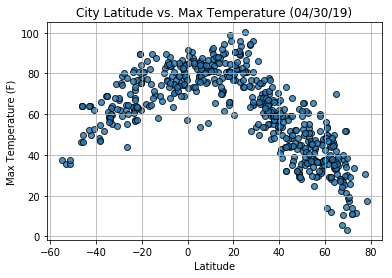

In [22]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

 Latitude vs. Humidity Plot

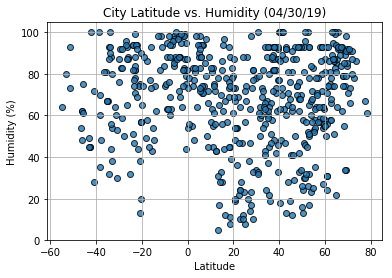

In [23]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

 Latitude vs. Cloudiness Plot

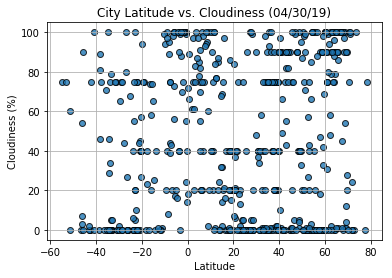

In [24]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, 
            cloudiness,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

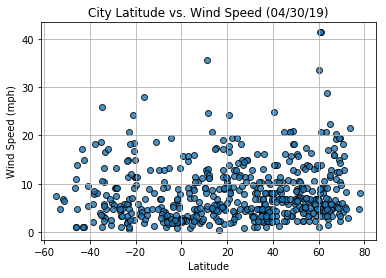

In [25]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()